## Import Libraries

In [42]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Plot settings
sns.set(rc= {'figure.figsize': [15, 7]}, font_scale= 1.2)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Reading and Exploring

In [43]:
df = pd.read_csv('./data.csv')

In [44]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [46]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [47]:
df.dropna(inplace= True)

In [48]:
df = df.astype({'CryoSleep': np.bool8})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   bool   
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 683.8+ KB


In [49]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [50]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [51]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3859,4135_01,Mars,False,F/777/S,TRAPPIST-1e,58.0,False,850.0,0.0,22.0,1493.0,0.0,Cakers Merte,False
7986,8542_01,Mars,True,E/544/P,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,0.0,0.0,Dow Chate,False
6022,6369_01,Earth,False,F/1318/P,PSO J318.5-22,19.0,False,577.0,169.0,0.0,7.0,0.0,Dian Holcompson,True
6759,7133_01,Earth,False,F/1368/S,TRAPPIST-1e,18.0,False,457.0,0.0,11.0,335.0,0.0,Tammyl Delangleton,False
6712,7084_01,Earth,False,F/1355/S,55 Cancri e,26.0,False,0.0,158.0,0.0,0.0,912.0,Faithy Hunterton,False


## Data visualization

Text(0.5, 1.0, 'How many passengers got transported to other dimension')

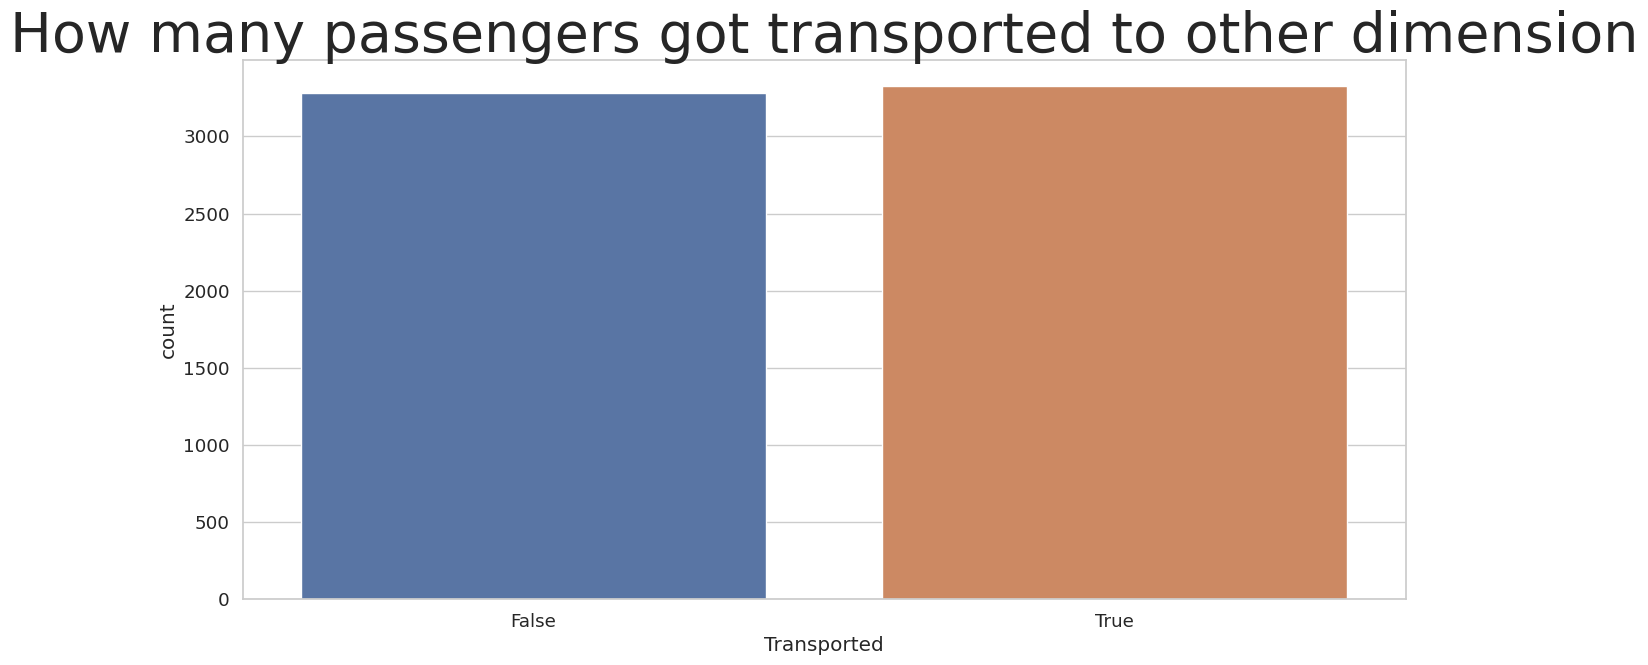

In [52]:
sns.countplot(df['Transported'])
plt.title('How many passengers got transported to other dimension', fontsize= 40)

Text(0.5, 1.0, 'How many passengers are VIP')

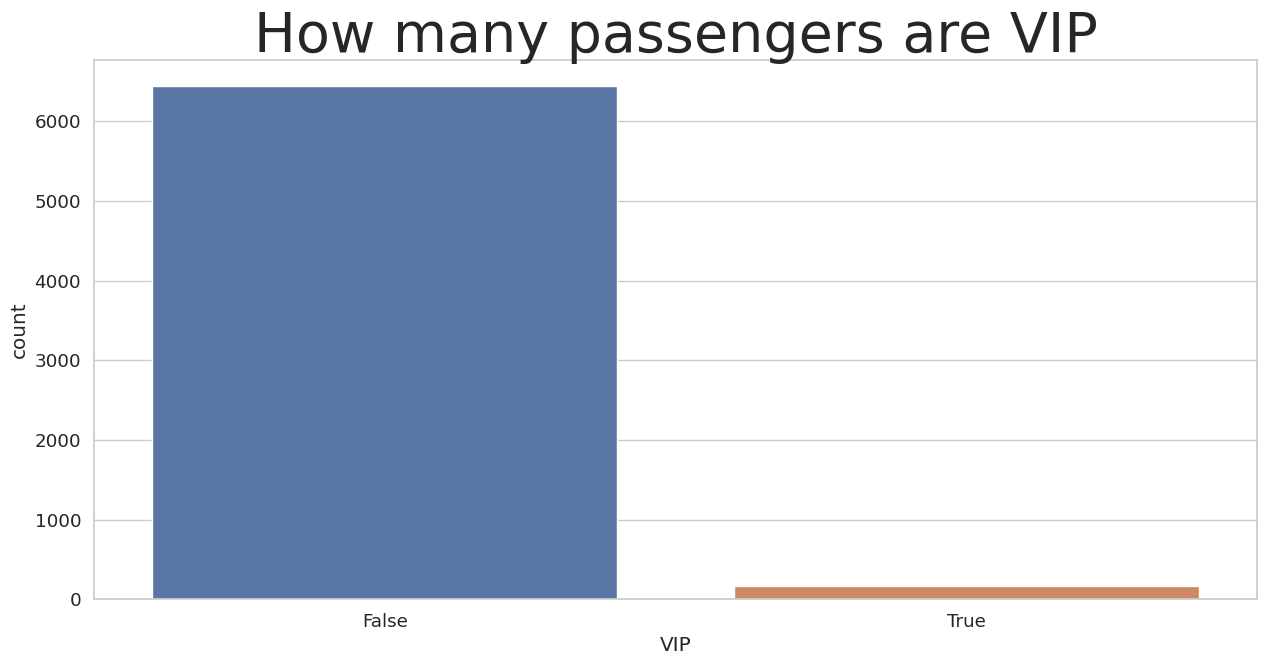

In [53]:
sns.countplot(df['VIP'])
plt.title('How many passengers are VIP', fontsize= 40)

Text(0.5, 1.0, 'Distribution of passengers age')

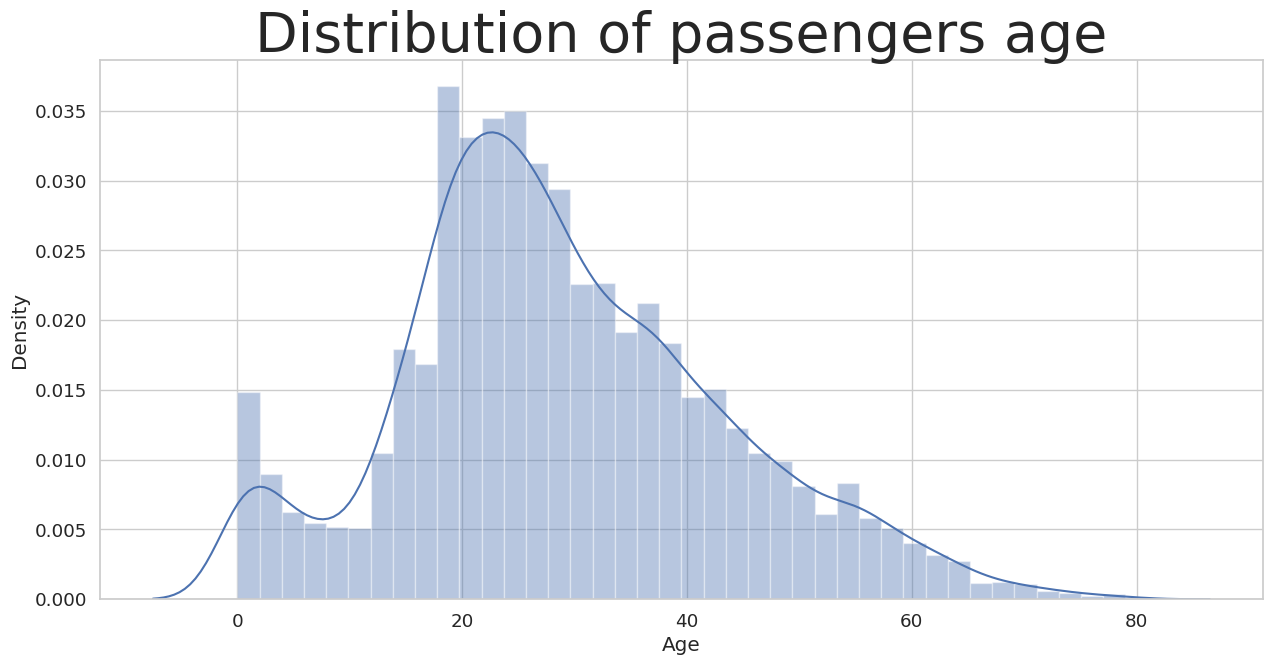

In [54]:
sns.distplot(df['Age'], kde= True)
plt.title('Distribution of passengers age', fontsize= 40)

Text(0.5, 1.0, 'How age affect transport rate')

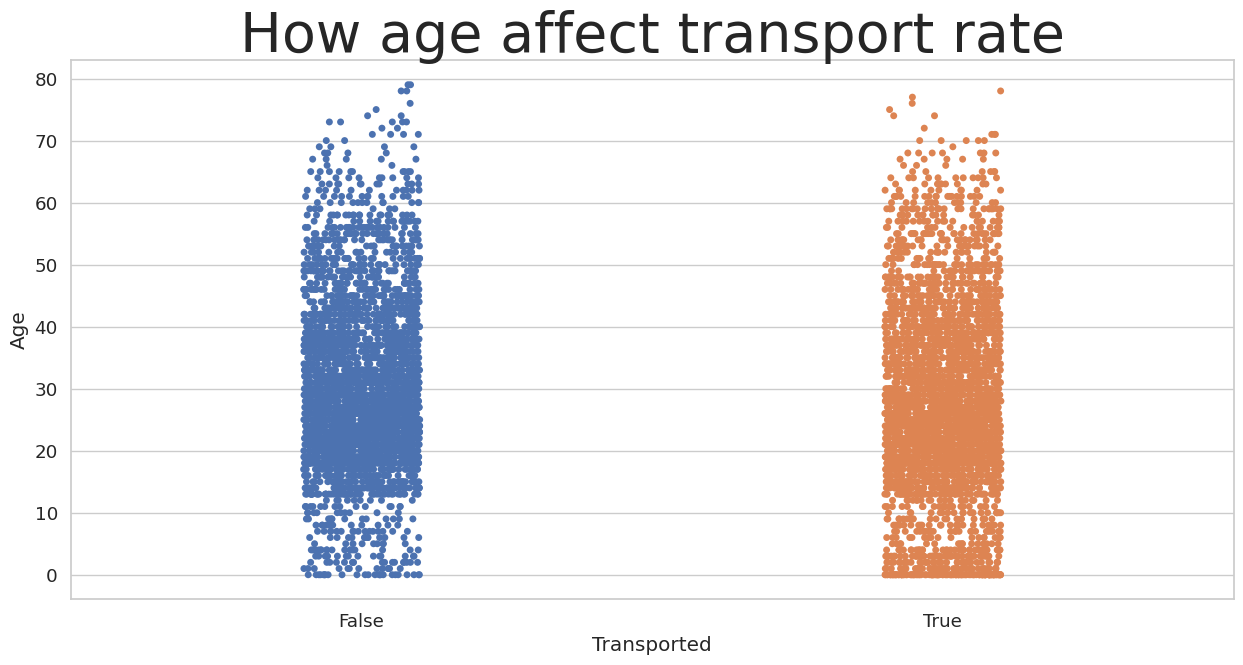

In [61]:
sns.stripplot(x= 'Transported', y= 'Age', data= df)
plt.title('How age affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How VIP status affect transport rate')

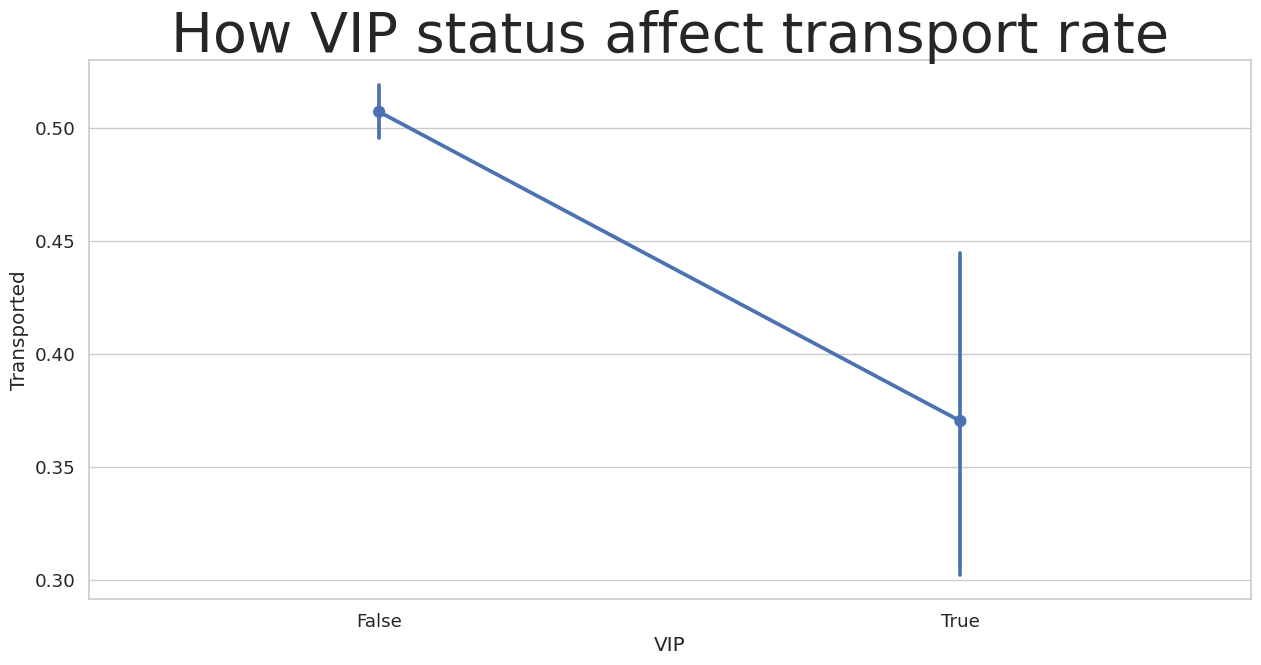

In [56]:
sns.pointplot(x= 'VIP', y= 'Transported', data= df)
plt.title('How VIP status affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How room service fee afect transport rate')

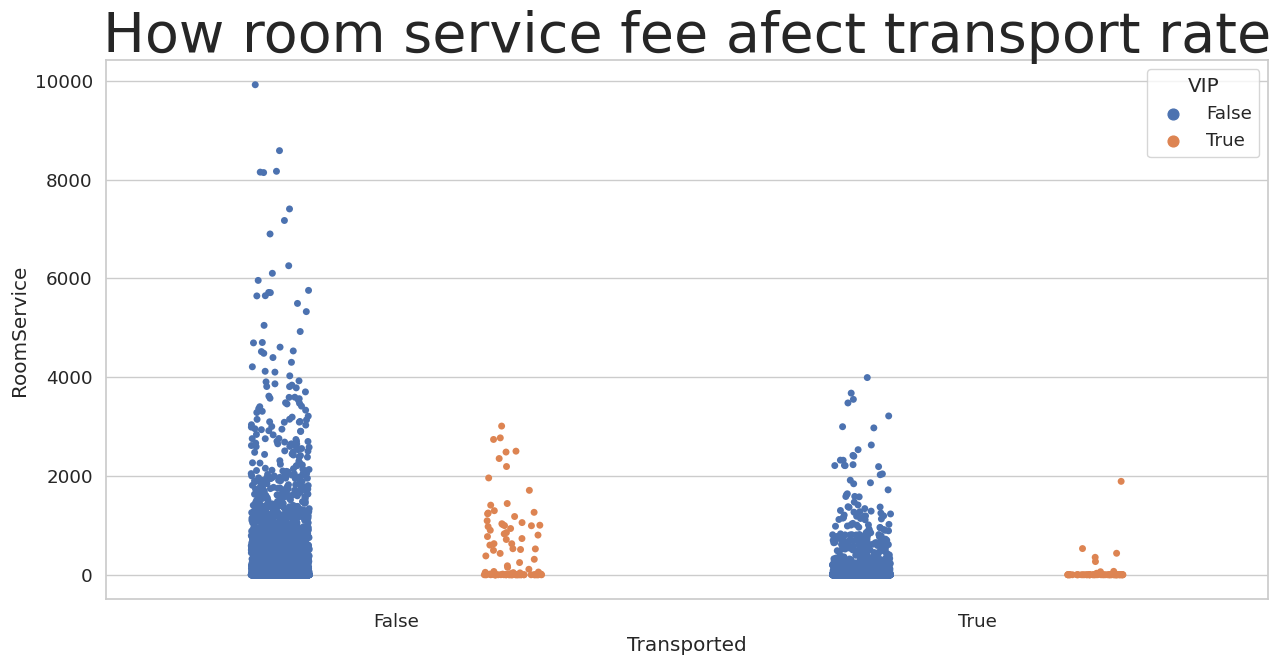

In [57]:
sns.stripplot(df['Transported'], df['RoomService'], hue= df['VIP'], dodge= True)
plt.title('How room service fee afect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How Food court fee affect Transport rate')

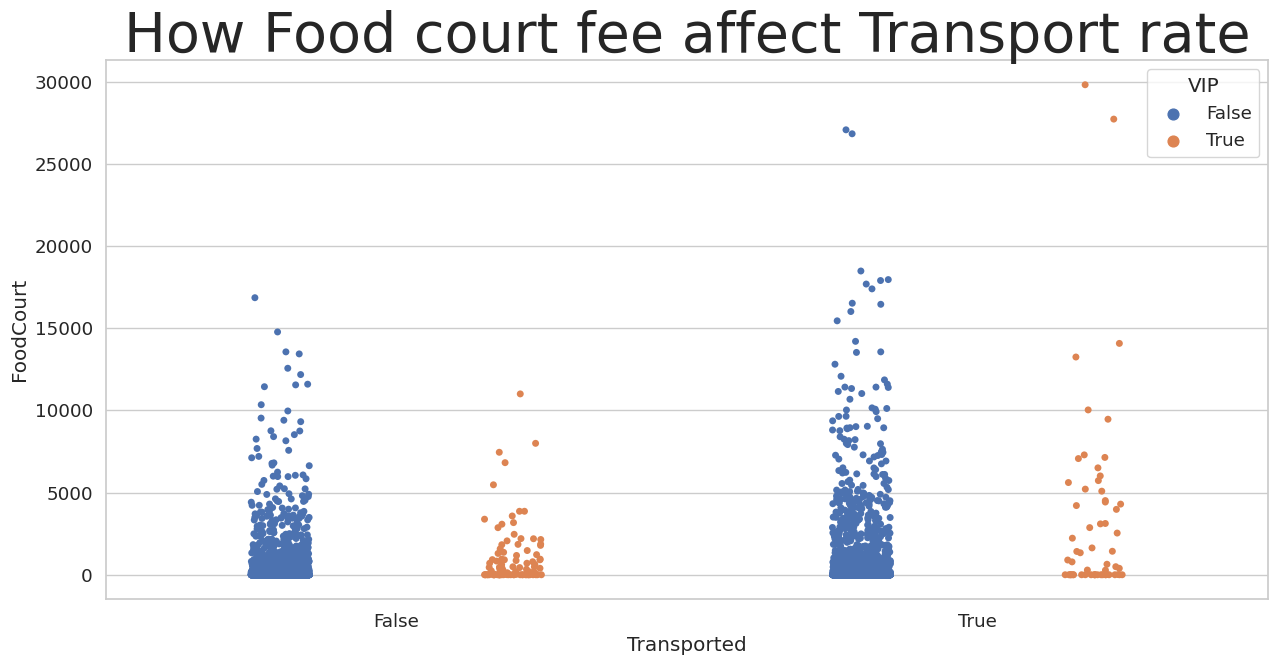

In [58]:
sns.stripplot(df['Transported'], df['FoodCourt'], hue= df['VIP'], dodge= True)
plt.title('How Food court fee affect Transport rate', fontsize= 40)

Text(0.5, 1.0, 'How shopping mall fee affect transport rate')

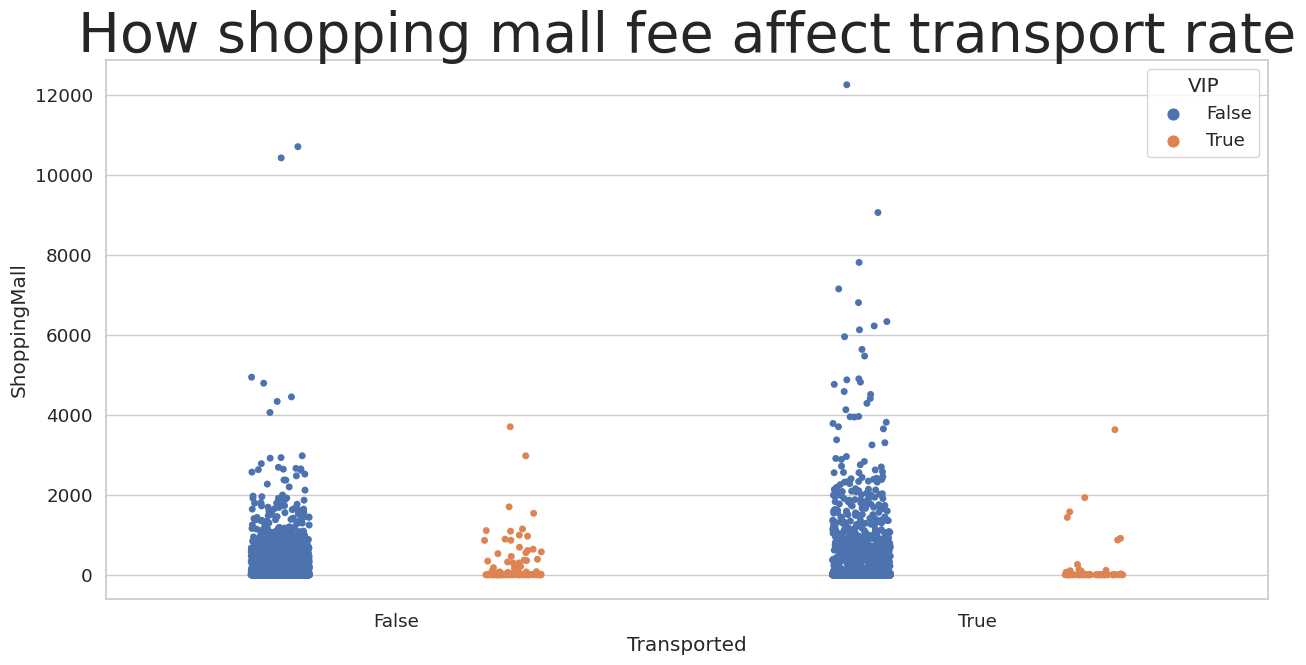

In [59]:
sns.stripplot(df['Transported'], df['ShoppingMall'], hue= df['VIP'], dodge= True)
plt.title('How shopping mall fee affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How Cryosleep affect Transport rate')

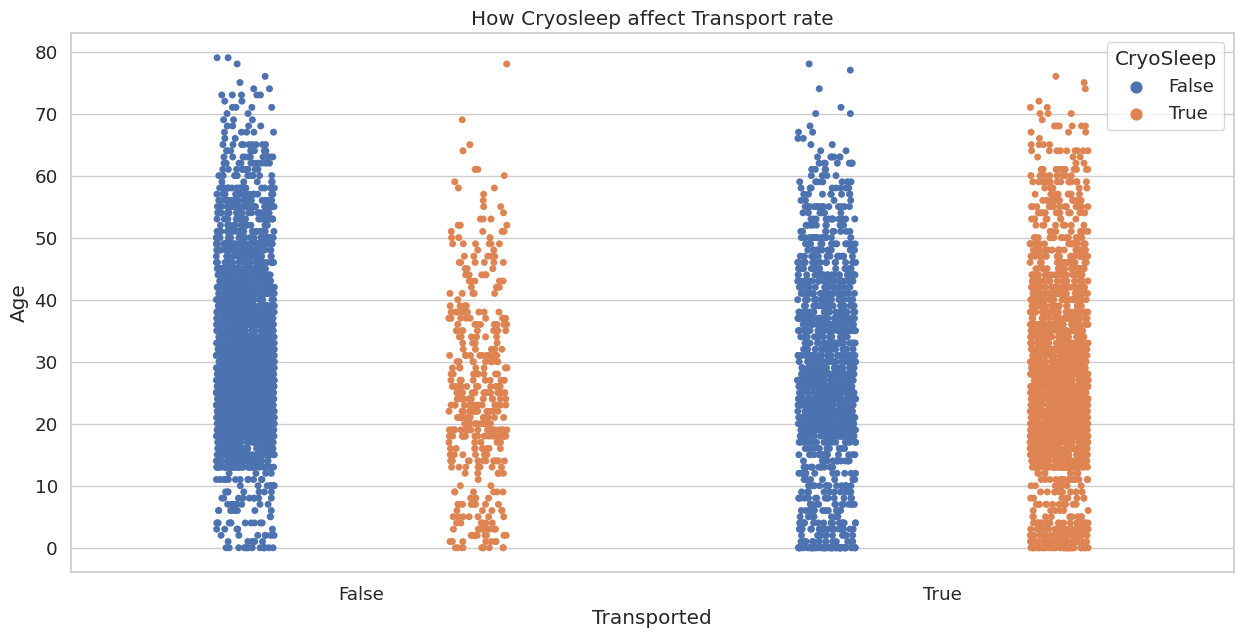

In [60]:
sns.stripplot(df['Transported'], df['Age'], hue= df['CryoSleep'], dodge= True)
plt.title('How Cryosleep affect Transport rate')

In [70]:
mask = np.triu(np.ones_like(df.corr().abs()))

Text(0.5, 1.0, 'Correlation between values')

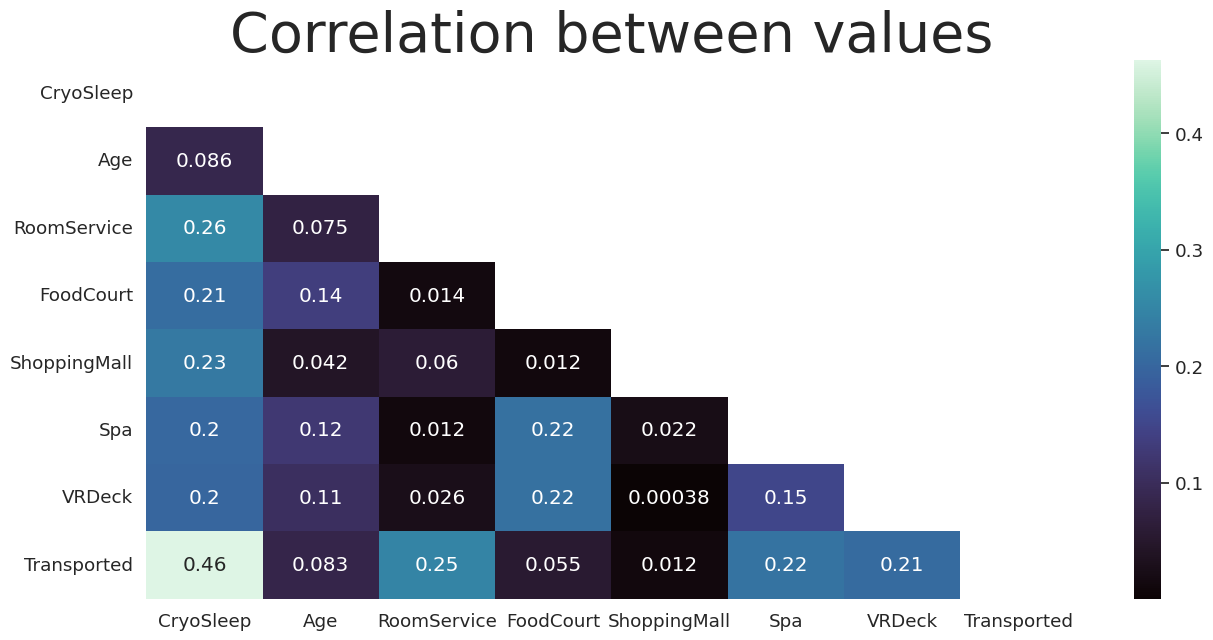

In [72]:
sns.heatmap(df.corr().abs(), cmap= 'mako', annot= True, mask= mask)
plt.title('Correlation between values', fontsize= 40)